In [2]:
import cPickle, glob, h5py, os, string, matplotlib
#matplotlib.use('Agg')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from imp import reload

from oc_ica import gabor_fit, plotting, analysis, styles
from oc_ica.analysis import compute_angles

/home/jesse/anaconda3/envs/python27/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Figure 1

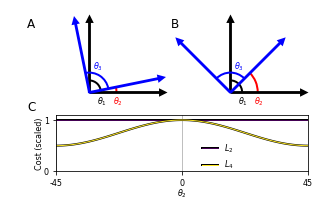

In [2]:
reload(plotting)
plotting.plot_figure1(os.path.join(os.environ['HOME'], 'Downloads/figure1.pdf'))

# Figure 2

Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0000076294
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.276515573263
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4722114586
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.291476326
Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.275001555681
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4721123957
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.293582881
Overcomplete ICA
Degeneracy control: L2
ICA with L-BFGS-B done!
Final loss value: 64.0000762939
Overcomplete ICA
Degeneracy control: L4
ICA with L-BFGS-B done!
Final loss value: 0.274383813143
Overcomplete ICA
Degeneracy 

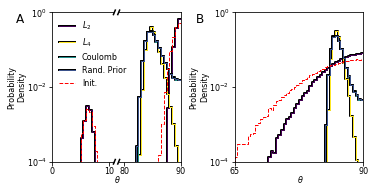

In [20]:
reload(plotting)
plotting.plot_figure2(os.path.join(os.environ['HOME'], 'Downloads/figure2.pdf'))

# Figure 3

Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4707889342
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.293656157
Overcomplete ICA
Degeneracy control: COULOMB_F
ICA with L-BFGS-B done!
Final loss value: 0.406739139452
Overcomplete ICA
Degeneracy control: RANDOM_F
ICA with L-BFGS-B done!
Final loss value: 0.545357082979
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4735977435
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value: 127.294901864
Overcomplete ICA
Degeneracy control: COULOMB_F
ICA with L-BFGS-B done!
Final loss value: 0.408505548314
Overcomplete ICA
Degeneracy control: RANDOM_F
ICA with L-BFGS-B done!
Final loss value: 0.54609631753
Overcomplete ICA
Degeneracy control: COULOMB
ICA with L-BFGS-B done!
Final loss value: 63.4737059855
Overcomplete ICA
Degeneracy control: RANDOM
ICA with L-BFGS-B done!
Final loss value

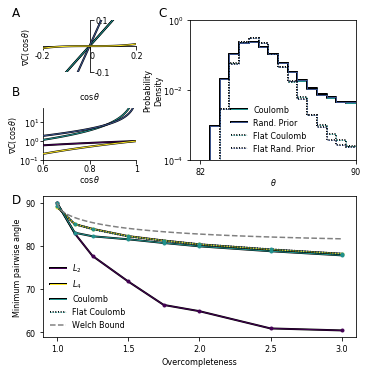

In [19]:
reload(plotting)
f_name = ('/home/jesse/Development/results/oc_ica/data_free_sources-32/' +
        'data_free-32_sources-96_ocs-1.0_1.125_1.25_1.5_1.75_2.0_2.5_3.0' +
        '_models-2_4_RANDOM_RANDOM_F_COULOMB_COULOMB_F.h5')
plotting.plot_figure3(f_name, os.path.join(os.environ['HOME'], 'Downloads/figure3.pdf'))